In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as pc
import pandas as pd
import numpy as np
from collections import Counter

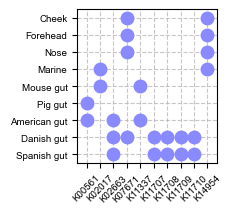

In [49]:
communities_namelist1 = ['Spanish_BiDgenes', 'Danish_BiDgenes', 'American_BiDgenes', 'Pig_BiDgenes', 'Mouse_BiDgenes', 'Marine_BiDgenes', 'Human_nose_BiDgenes', 'Human_forehead_BiDgenes', 'Human_cheek_BiDgenes']
communities_namelist2 = ['Spanish gut', 'Danish gut', 'American gut', 'Pig gut', 'Mouse gut', 'Marine', 'Nose', 'Forehead', 'Cheek']

human_skin_bimodalgenes = []
other_bimodalgenes = []
for i in range(len(communities_namelist1)):
    if i <6:
        bimodalgene = pd.read_csv('bimodal genes/'+communities_namelist1[i],sep='\t').iloc[:,0].tolist()
        for gene in bimodalgene:
            other_bimodalgenes.append(gene)
    if i >=6:
        bimodalgene = pd.read_csv('bimodal genes/'+communities_namelist1[i],sep='\t').iloc[:,0].tolist()
        for gene in bimodalgene:
            human_skin_bimodalgenes.append(gene)

human_skin_bimodalgenes_treetimes=[gene for gene,n in Counter(human_skin_bimodalgenes).items() if n==3]
other_bimodalgenes_moretimes=[gene for gene,n in Counter(other_bimodalgenes).items() if n>=2]
other_bimodalgenes_list=list(set(other_bimodalgenes))
same_bimodal_genes = [gene for gene in other_bimodalgenes_moretimes]
for gene in human_skin_bimodalgenes_treetimes:
    if gene in other_bimodalgenes_list:
        same_bimodal_genes.append(gene)
same_bimodal_genes = sorted(list(set(same_bimodal_genes)))

#plot
plt.figure(figsize=(1.8,2.0))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
data = np.zeros((len(communities_namelist1),len(same_bimodal_genes)))
for j in range(len(communities_namelist1)):
    bimodalgene = pd.read_csv('bimodal genes/'+communities_namelist1[j],sep='\t').iloc[:,0].tolist()
    gene = [gene for gene in bimodalgene if gene in same_bimodal_genes]
    for k in range(len(gene)):
        y = j
        x = same_bimodal_genes.index(gene[k])
        plt.plot(x,y,color='#8A8AFF',marker='o',markersize=9) 
        data[y,x]=1       
plt.yticks(ticks=np.arange(0,len(communities_namelist1),1),labels=communities_namelist2,fontsize=7,fontfamily='Arial')   
plt.xticks(ticks=np.arange(0,len(same_bimodal_genes),1),labels=same_bimodal_genes,fontsize=7,fontfamily='Arial',rotation=45)
plt.xlim(-0.7,len(same_bimodal_genes)-0.3)
plt.ylim(-0.5,len(communities_namelist1)-0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('fig/The same bimodal genes in different communities.pdf',bbox_inches='tight')
pd.DataFrame(data,index=communities_namelist2,columns=same_bimodal_genes).to_csv('fig/The same bimodal genes in different communities.csv',index=True,sep=',')